1. Explain theoratical Simple Linear Regression model
I would say that linear Regression model is using mathematics to find a line of best fit which shows relationship(correlation) for a set of data of Y and x, in the process, the deviation of Y calculated from the line to data is summed up and be minimized by algorithms so that the best slope($\beta_1$) and y-intercept($\beta_0$) is selected. The result will be $Y=\beta_0+\beta_1x+\epsilon$, where the noise $\epsilon \sim N(0, \sigma^2)$, using mathematics, we can say that $Y \sim N(\beta_0+\beta_1x, \sigma^2)$. This means that more samples of Y and x can be generated by these estimators using normal distribution. For the term theoratical, ir means that we made an imaginary world where the population parameter is what we selected, all the data follows our selection.


roughly demonstrated by code below.

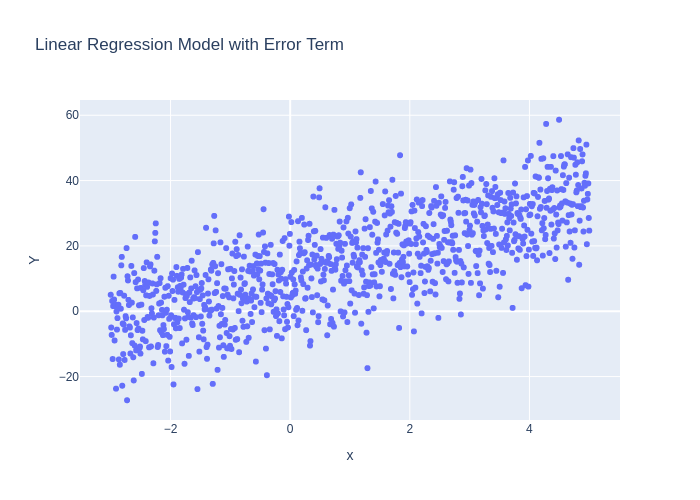

In [16]:
# create a linear regresstion model
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import norm


# fix parameters(theoradical)
beta_1 = 5
beta_0 = 10
sigma = 10
n = 1000


x = np.linspace(-3,5,n)
error_term = norm.rvs(loc=0, scale=sigma, size=n)

Y = beta_0 + beta_1 * x + error_term

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

fig.update_layout(
    xaxis_title="x",
    yaxis_title="Y",
    title="Linear Regression Model with Error Term"
)

fig.show("png")

Chatbot link: https://chatgpt.com/share/6722aacc-fe84-8002-9208-b8e72485a185


Summary of Interactions:
Explanation of Simple Linear Regression:

You asked for an explanation of the theoretical Simple Linear Regression model. I described its components, including the predictor and outcome variables, slope and intercept coefficients, and the error term, emphasizing the relationship between these elements.
Translation Request:

You requested a translation of the explanation into Chinese. I provided the translated version, maintaining the key points about the components of the Simple Linear Regression model.
Generating Data with Numpy:

You asked for a way to generate data for the equation 
𝑌
=
5
𝑥
+
10
+
error
Y=5x+10+error using 
𝑥
=
1
x=1. I provided Python code using Numpy to generate 100 values of 
𝑌
Y with a random error term.
Visualizing Error Term Distribution:

You requested to create a normal distribution graph using Plotly based on the error term generated earlier. I encountered an issue with the plotting tool, so I suggested either saving the plot as an image or running the code locally.
Introduction to scipy.stats and Normal Distribution:

I explained the scipy.stats module, focusing on how it can be used to work with normal distributions, including generating random samples, calculating the probability density function (PDF), cumulative distribution function (CDF), and quantiles.
Adjusting Code to Use scipy.stats.norm:

You provided code for a linear regression model and asked for adjustments to use scipy.stats.norm to generate data instead of numpy. I modified the code accordingly, replacing the error term generation to utilize scipy.stats.norm.
Final Code Review:

You shared the adjusted code for the linear regression model and requested further assistance. I confirmed the changes and reiterated how to use scipy.stats.norm to generate the error term.

2. Code below

In [17]:
import statsmodels.formula.api as smf
import pandas as pd


df = {'Y': Y, 'x': x}
model_data_specification = smf.ols("Y~x", data=df)
fitted_model = model_data_specification.fit()
fitted_model.summary()  # simple explanation? 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1204.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          1.16e-173
Time:                        00:09:14   Log-Likelihood:                -3735.3
No. Observations:                1000   AIC:                             7475.
Df Residuals:                     998   BIC:                             7484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2973      0.350     29.448      0.000       9.611      10.983
x              4.8167      0.139     34.694      0.000       4.544       5.089
==============================================================================
Omnibus:                        2.928   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.901
Skew:                          -0.099   Prob(JB):                        0.234
Kurtosis:                       2.826   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
fitted_model.summary().tables[1]  # simple explanation?

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,10.2973,0.350,29.448,0.000,9.611,10.983
x,4.8167,0.139,34.694,0.000,4.544,5.089


In [19]:
fitted_model.params  # simple explanation?

Intercept    10.297255
x             4.816666
dtype: float64

In [20]:
fitted_model.params.values  # simple explanation?

array([10.2972554 ,  4.81666581])

In [21]:
fitted_model.rsquared  # simple explanation?

0.5467123097063564

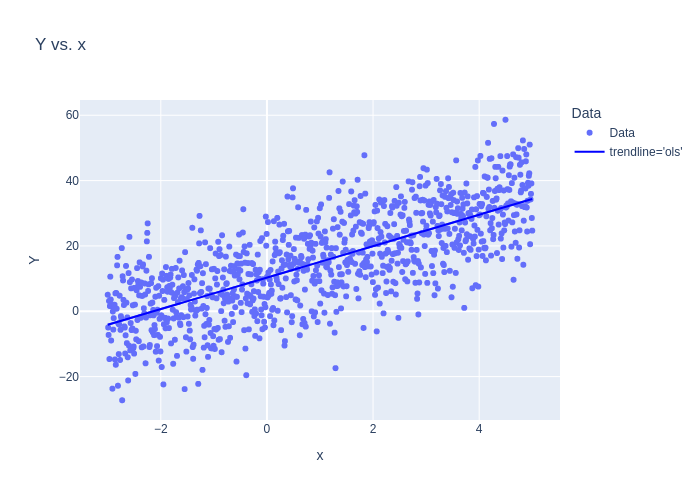

In [22]:
# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

3. code below


the red line from Q1 is theoratical, it represents the population distribution


the blue line from Q2 is esitimated, it is what we inferenced from dataset which follows red line to approach the population, we use algorithms and mathematics to calculate best estimators using the dataset.It is not the true population distribution but closed to that.

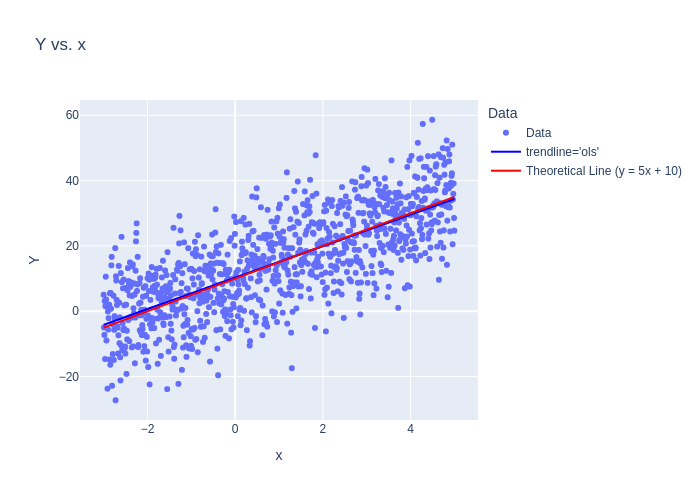

In [23]:
# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.add_trace(go.Scatter(x=x, y=5*x + 10, mode='lines', name='Theoretical Line (y = 5x + 10)', line=dict(color='red')))

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4. fitted_model.fittedvalues == fitted_model.params.values[0] + fitted_model.params.values[1]*x, i.e. it is the $Y_i$ calculated by $Y_i = \beta_0+\beta_1*x_i$ de monstrated by code below

In [24]:
fitted_model.fittedvalues

0      -4.152742
1      -4.114170
2      -4.075598
3      -4.037026
4      -3.998454
         ...    
995    34.226297
996    34.264869
997    34.303441
998    34.342013
999    34.380584
Length: 1000, dtype: float64

In [25]:
fitted_model.params.values

array([10.2972554 ,  4.81666581])

In [26]:
intercept,slope = fitted_model.params.values
ys = slope*x+intercept
all(ys == fitted_model.fittedvalues)

True

5.Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"


Let me divide this question into small part. I will use kind od rigrous mathematical language


The first part's answer is that we need to find the $\beta_0, \beta_1$ in the line which minimize our loss function RSS based on dataset$$RSS = \sum_{i=1}^{n}{(\bar Y_i-Y_i)^2}, \bar Y_i = \beta_0+\beta_1x_i$$

The last part is simple, if we directly sum up, negative loss will cancel out positive deviation, so total loss for -100 and 100 is same as 0 and 0, which seems to be ridiculous. So we need to eliminate the negative value, the reason why we do not use absolute value is simple: it might not be differenciable, which is a useful mathematical property, whereas square is differenciable so we can take parcial derivative and easily find the turing point(i.e. point of minimal error since we ensure positiveness of the quadratics to ensure convexness of the loss function).


Since we are checking for simple linear regression, only linear relationship between one dependent variable and one independent variable, so it is easy to find mathematical formula. \bar represents average(esimated)


First, our loss function is $$RSS = \sum_{i=1}^{n}{(\bar Y_i-Y_i)^2}$$
And we need to find the $\beta_0, \beta_1$ in the line which minimize RSS$$\bar Y_i = \beta_0+\beta_1x_i$$
let's denote RSS as E, we can take partial derivative of the function below with respect to $\beta_1$ and $\beta_0$
$$E = \sum_{i=1}^{n}{(\beta_0+\beta_1x_i-Y_i)^2}$$
note that all $Y_i$ and $x_i$ here are constants, we have
$$\frac{\partial E}{\partial \beta_1} =2\sum_{i=1}^{n} \beta_1x_i^2+\beta_0x_i-x_iY_i$$
$$\frac{\partial E}{\partial \beta_0} =2\sum_{i=1}^{n} \beta_0+\beta_1x_i-Y_i$$
Using basic calculus facts and convexness of positive quadratics, we know that E is minimal when the two partial derivatives are both 0.


from $$\frac{\partial E}{\partial \beta_0} =2\sum_{i=1}^{n} \beta_0+\beta_1x_i-Y_i = 0$$
we know $$ \beta_0 = \bar Y - \beta_1\bar x$$
subsitute into $$\frac{\partial E}{\partial \beta_1} =2\sum_{i=1}^{n} \beta_1x_i^2+\beta_0x_i-x_iY_i = 0$$
we have $$0 = \sum^{n}_{i = 1}\beta_1x^2_i+(\bar Y-\beta_1\bar x)x_i-x_iY_i$$
then $$\beta_1 = \frac{\sum^n_{i=1}x_iY_i-\bar Y\sum^{n}_{i=1}{x_i}}{\sum^{n}_{i=1}{x_i^2}-\bar x\sum^{n}_{i=1}{x_i}}$$
(note that $\bar x$ means mean of $x_i$ and same for Y) Then do some simplification so that less calculation is required
$$\beta_1 = \frac{\sum^n_{i=1}(x_i-\bar x)(Y_i-\bar Y)}{\sum^{n}_{i=1}{(x_i-\bar x)^2}} = \frac{cov(x,Y)}{n Var(x)}$$
Thus, the line is decided by formula below. For multivariable linear regression, linear algebra is introduced to calculate $\beta$s.But for non-linear regression, the matrix can be not invertible, then gradient-decent method can be used.
$$\left\{\begin{matrix} 
  \beta_1 = \frac{\sum^n_{i=1}(x_i-\bar x)(Y_i-\bar Y)}{\sum^{n}_{i=1}{(x_i-\bar x)^2}} \\  
  \beta_0 = \bar Y - \beta_1\bar x
\end{matrix}\right. $$

6.
a)Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"


$$\text{Total Variation}=(Y−Y.mean())^2.sum()$$
$$\text{Unexplained Variation}=(Y−Y.\text{fitted model.fittedvalues})^2.sum()$$
Divide them will get the proportion of unexplained variation, then use 1-proportion to negate, Thus we get
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum() as explained variation

b)why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model?


The formula 1 is equivalent to R^2, so R^2 is explained variation which is measure of accuracy of the model.


c)what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models


The first one is R^2, it shows the strength of relation of Y and fitted_model.fittedvalues, i.e. the ability for the model to explain variation of Y.


Whereas the second one shows the correlation coefficient between Y and x, regression model is not included.



In [27]:
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()

0.5467123097063566

In [28]:
fitted_model.rsquared

0.5467123097063564

In [29]:
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2


0.5467123097063571

In [30]:
np.corrcoef(Y,x)[0,1]**2

0.5467123097063573

7. Code below
It looks like that the dataset is not linear relationship but exponential


Independence of Errors: does these data are from same year? Sunlight might change yield. Does there data are for the same soil? Different soil have different NPK contents lead to different yield. Did they use same fertilizer? Did they use same crop? obviouly potato yield is differ from wheat yield.All of theses might affect the error.

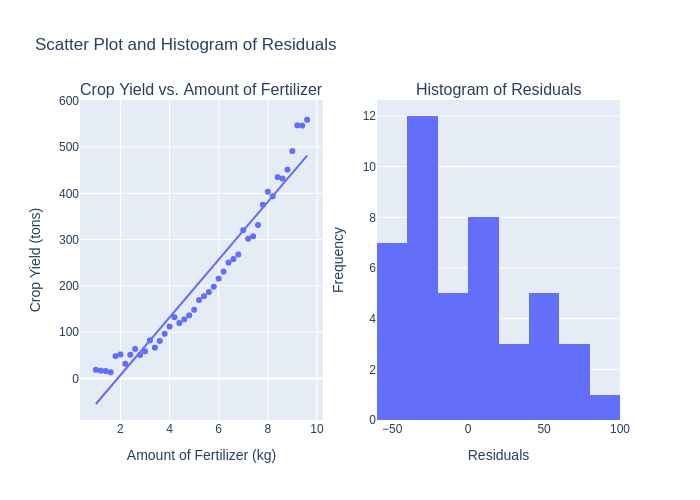

In [32]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

8.
$$ H_0: \beta_1\ = 0$$

In [1]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:27:50   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My subsequent beliefs regarding the Old Faithful Geyser dataset: Since p-value is less than 0.001, There is Very strong evidence against the null hypothesis.

9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


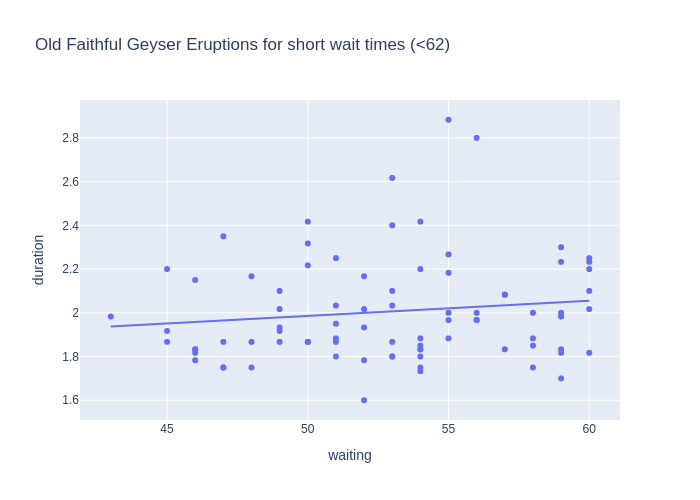

In [3]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Based on summary above, since p-value is 0.238 when short_wait_limit = 62, p>0.1, we have no evidence against the null hypothesis.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


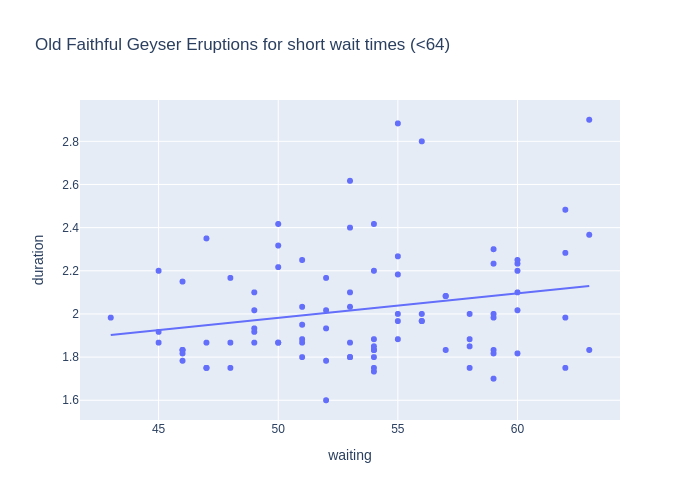

In [5]:
short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Based on summary above, since p-value is 0.036 when short_wait_limit = 64, 0.05>p>0.01, we have moderate evidence against the null hypothesis.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


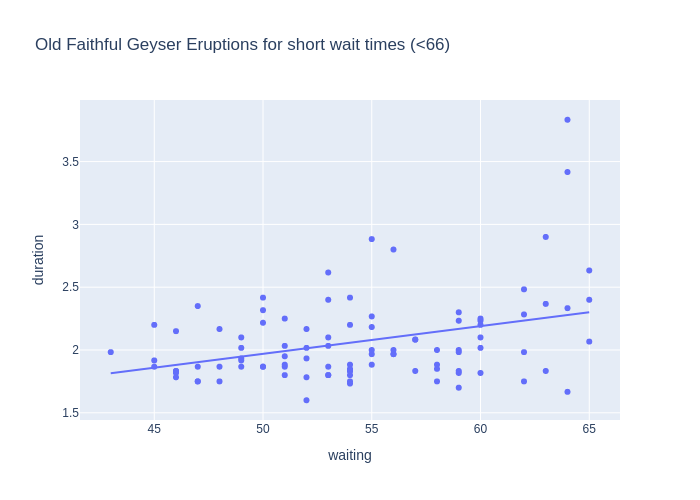

In [6]:
short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Based on summary above, since p-value is 0.000 when short_wait_limit = 66, 0.001>p, we have very strong evidence against the null hypothesis.

10. code is below

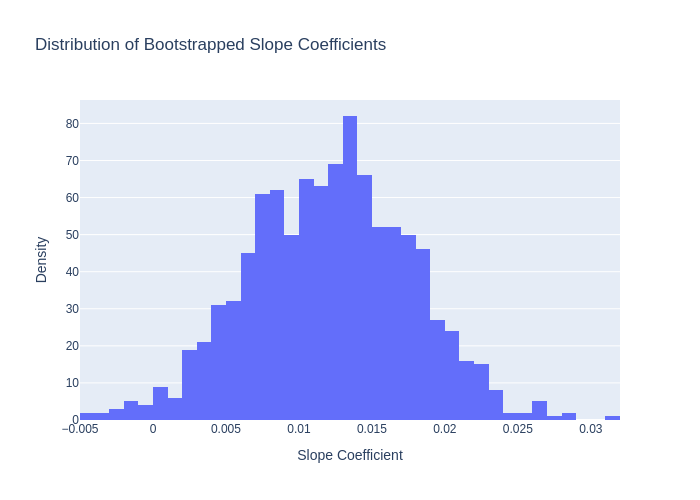

In [76]:
import plotly.express as px
import numpy as np

sample_size = 160
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
n = 1000
np.random.seed(114514)

bootstapped_slopes = [0 for _ in range(1000)]

for i in range(1000):
    bootstrap_data = old_faithful[long_wait].sample(n=sample_size, replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_data).fit()
    bootstapped_slopes[i]= bootstrap_model.params['waiting']

fig = px.histogram(bootstapped_slopes,
                   title="Distribution of Bootstrapped Slope Coefficients",
                   )

fig.update_layout(
    xaxis_title="Slope Coefficient",
    yaxis_title="Density",
    showlegend=False
    )

fig.show(renderer='png')

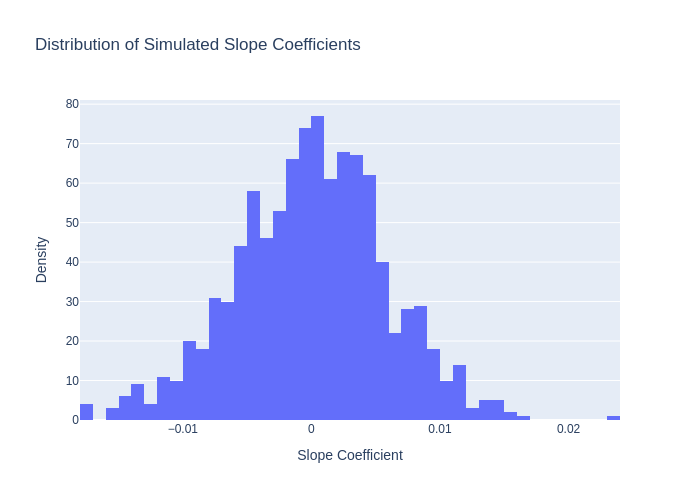

In [83]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf


np.random.seed(114514)
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n = 160 # given by the question title
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
simulated_slopes = [0 for _ in range(1000)]
x = old_faithful[long_wait].waiting
for i in range(1000):
    Y = beta_0 + beta_1 * x + stats.norm.rvs(loc=0, scale=sigma, size=n)
    simulated_model = smf.ols('Y ~ x', data={'x': x, 'Y': Y}).fit()
    simulated_slopes[i] = simulated_model.params['x']

simulated_slopes = np.array(simulated_slopes)

fig = px.histogram(simulated_slopes,
                   title="Distribution of Simulated Slope Coefficients",
                   )

fig.update_layout(
    xaxis_title="Slope Coefficient",
    yaxis_title="Density",
    showlegend=False
    )
fig.show(renderer='png')

In [85]:
smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


In [98]:
ci95 = bootstrap_model.conf_int(alpha=0.05)
print(ci95)
simulated_p = (np.abs(simulated_slopes) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean()
print(f'simulated p-value is {simulated_p}')

                  0         1
Intercept  3.161005  5.144469
waiting   -0.009692  0.014838
simulated p-value is 0.042


/tmp/ipykernel_101/2310310013.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0 is in the 95% bootstrapped confidence interval, and p-value does not differs far from 0.038, which means matching.

In [93]:
smf.ols('duration ~ waiting', data=old_faithful).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        23:22:19   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

11.1: smf.ols('duration ~ waiting', data=old_faithful) is a continuous straight line, but after k_i is added into account, the new picture are two lines that are not connecting and each are more precisely fit into data in each catagory. The function is still one-one, but no more continuous.

11.2 and 11.3 smf.ols('duration ~ waiting', data=old_faithful[long_wait]) and smf.ols('duration ~ waiting', data=old_faithful[long_wait]) 


The new picture is basically just plot the two lines together so that they are on the same graph, its domain and image is intersection of the two "smaller" functions

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


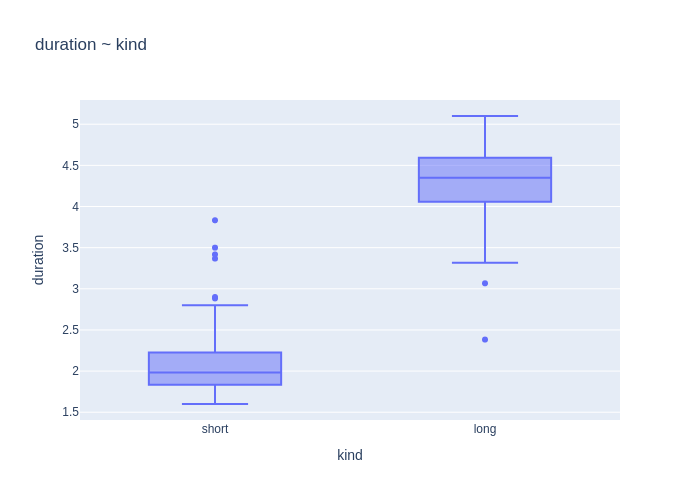

In [97]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

p<0.001, so we have very strong evidence against a null hypothesis of "no difference between groups"

In the coding part above, I did not use Chatbot since it always give wrong answer.

12.

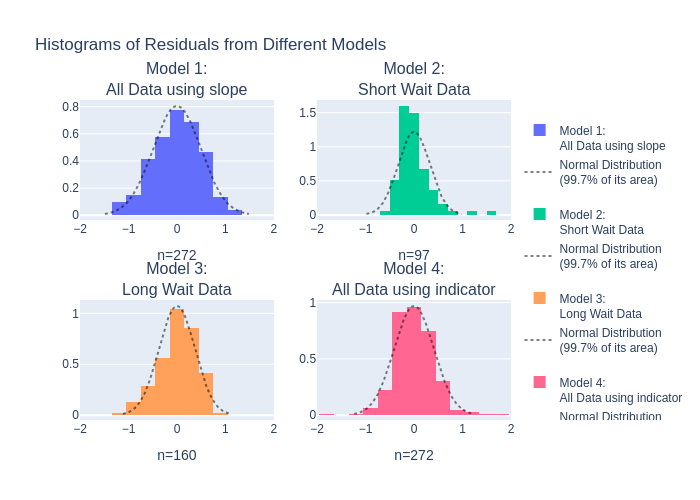

In [106]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

only Model 1 is plausible, because 2 and 4 shows large deviation from the dotted line of approximation. And obviously 3 and 2 are skewed but normal distribution are symmetric.

13.

Permutation Test P-Value: 0.0000


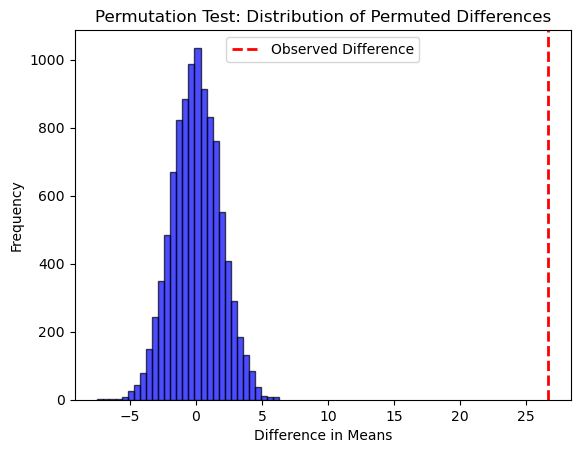

In [103]:
import matplotlib.pyplot as plt




def permutation_test(group_A, group_B, num_permutations=10000):
    # Combine the two groups
    combined = np.concatenate([group_A, group_B])
    
    # Store the differences from permutations
    permuted_diffs = []
    
    for _ in range(num_permutations):
        # Shuffle the combined data
        np.random.shuffle(combined)
        
        # Split the shuffled data into two new groups
        new_group_A = combined[:len(group_A)]
        new_group_B = combined[len(group_A):]
        
        # Calculate the difference in means
        permuted_diff = np.mean(new_group_A) - np.mean(new_group_B)
        permuted_diffs.append(permuted_diff)
    
    return permuted_diffs
group_A, group_B = old_faithful[long_wait].waiting, old_faithful[short_wait].waiting
observed_mean_A = np.mean(group_A)
observed_mean_B = np.mean(group_B)
observed_diff = observed_mean_A - observed_mean_B

permuted_diffs = permutation_test(group_A, group_B)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f'Permutation Test P-Value: {p_value:.4f}')

# Plot the distribution of permuted differences
plt.hist(permuted_diffs, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.title('Permutation Test: Distribution of Permuted Differences')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Far so H_0 can be rejected

95% Bootstrap Confidence Interval for the Difference in Means: (25.30, 28.01)


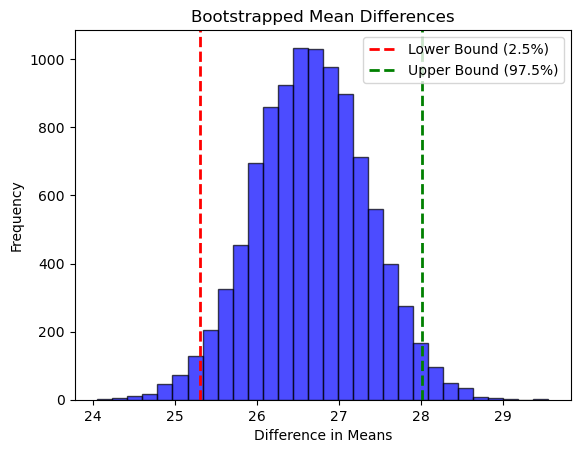

In [104]:
def bootstrap_ci(group_A, group_B, num_bootstrap=10000, alpha=0.05):
    # Store the differences in means
    bootstrapped_mean_differences = []
    
    for _ in range(num_bootstrap):
        # Bootstrap samples with replacement
        sample_A = np.random.choice(group_A, size=len(group_A), replace=True)
        sample_B = np.random.choice(group_B, size=len(group_B), replace=True)
        
        # Calculate means
        mean_A = np.mean(sample_A)
        mean_B = np.mean(sample_B)
        
        # Calculate the difference in means
        mean_difference = mean_A - mean_B
        bootstrapped_mean_differences.append(mean_difference)
    
    # Calculate the confidence interval
    lower_bound, upper_bound = np.quantile(bootstrapped_mean_differences, [alpha/2, 1-alpha/2])
    
    return lower_bound, upper_bound, bootstrapped_mean_differences

# Perform bootstrap and calculate CI
lower_bound, upper_bound, bootstrapped_mean_differences = bootstrap_ci(group_A, group_B)

print(f'95% Bootstrap Confidence Interval for the Difference in Means: ({lower_bound:.2f}, {upper_bound:.2f})')

# Plot the distribution of bootstrapped mean differences
plt.hist(bootstrapped_mean_differences, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound (2.5%)')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound (97.5%)')
plt.title('Bootstrapped Mean Differences')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

(a) Explanation of Sampling Approaches for Two Simulations
1. Permutation Test:

Here the sampling is for the universe where $H_0$ is true, and then we compare it with what we actually see in our universe.


2. Bootstrap Confidence Interval:


Here the sampling is for a lot of different universe get different data and then we count the statistics from each universe.


(b) Comparison and Contrast with Indicator Variable Based Model


All three approaches (permutation test, bootstrap confidence interval, and indicator variable model) are grounded in hypothesis testing and making inference about difference in two groups.


Both of them does not require assumption, but indicator variable needs to assume linear relationship.


(A) needs human observation and only yes or no. (B) provides a range.   Indicatior Variable provide a suggested relationship

14. SomeWhat